<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/fa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook for chapters 2 and 3 of  
# the Computational Models and Formal Languages Book

<a href="https://samyzaf.com/afl.pdf">
<img src="https://samyzaf.com/afl/afl1.jpg" alt="CMFL book cover"/>
</a>

* The purpose of this notebook is to allow students and readers of
  the CMFL book to conveniently simulate finite automata on a Google Colab environment
  (without having to install anything on their computer or device).
* For that purpose we've built a simple Python wrapper package **pyfasim**,
  around the excellent automata-lib package
  (thanks to its author Caleb Evans <caleb@calebevans.me>).
* It can be used to define easily standard examples of finite automata, and then run experiments,
  check statements, and draw diagrams.
* The simplified wrapper is intended to make it accessible to first or second year college students
  without Python knowledge or even with no programming experience.
* We'll be glad to get feedback and code for solving exercises from the book.

## Installing the **pyfasim** package
* Depending on the virtual machine allocated to you
  (or the local machine you are runnig this Jupyter notebook),
  you may need to install the latest python3-dev/graphviz lib.

* In such case you will have to run the next line of code.

In [ ]:
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config

* The next line must be run in order to install
  the **pyfasim** package on the
  machine on which the notebook runs.
* The second line is required to import the package.

In [2]:
%pip install -q https://samyzaf.com/pyfasim.zip
from pyfasim import *

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.0/238.0 kB 10.1 MB/s eta 0:00:00


## Defining a Deterministic Finite Autamata (DFA)
* The **DFA** command creates a new Deterministic Finite Autamata
  by specifying its name, states, input_symbols, transitions,
  initial_state, and final_states
* The following example is a typical.
* You may copy it and solve some of the exercises in the book.

In [3]:
fa1 = DFA("""
name: foo
states: q0 q1 q2 q3
input_symbols: 0 1
transitions:
    q0:  0:q1  1:q0
    q1:  0:q2  1:q0
    q2:  0:q3  1:q2
    q3:  0:q1  1:q2
initial_state: q0
final_states: q2 q3
""")


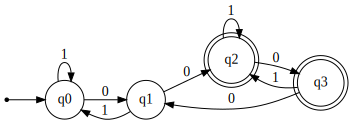

In [4]:
fa1.show_diagram()

In [5]:
fa1.name

'foo'

In [6]:
fa2 = DFA("""
states: q0 q1 q2 q3
input_symbols: 0 1
transitions:
    q0:  0:q3 1:q2
    q1:  0:q1  1:q2
    q2:  0:q0  1:q3
    q3:  0:q1  1:q1
initial_state: q0
final_states: q2 q3
""")

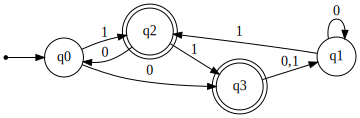

In [7]:
fa2.show_diagram()

In [8]:
fa3 = DFA("""
states: q0 q1 q2 q3 q4 q5
input_symbols: 0 1
transitions:
    q0:  0:q1 1:q3
    q1:  0:q0  1:q3
    q2:  0:q1  1:q4
    q3:  0:q5  1:q5
    q4:  0:q3  1:q3
    q5:  0:q5  1:q5
initial_state: q0
final_states: q3 q5
""")

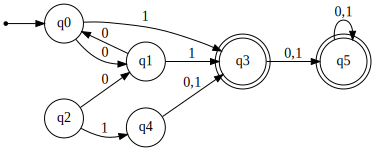

In [9]:
fa3.show_diagram()

In [10]:
fa4 = DFA("""
states: q0 q1 q2
input_symbols: 0 1
transitions:
    q0:  0:q1 1:q2
    q1:  0:q1  1:q2
    q2:  0:q1  1:q2
initial_state: q0
final_states: q1
""")

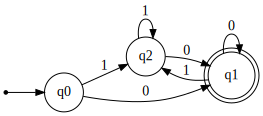

In [11]:
fa4.show_diagram()

In [12]:
fa5 = DFA("""
states: q0 q1
input_symbols: 0 1
transitions:
    q0:  0:q1 1:q0
    q1:  0:q1  1:q0
initial_state: q0
final_states: q1
""")

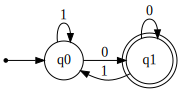

In [13]:
fa5.show_diagram()

In [14]:
fa6 = DFA("""
states: q0 q1 q2 q3 q4
input_symbols: 0 1
transitions:
    q0:  0:q0 1:q1
    q1:  0:q1  1:q2
    q2:  0:q2  1:q3
    q3:  0:q3  1:q4
    q4:  0:q4  1:q0
initial_state: q0
final_states: q0
""")

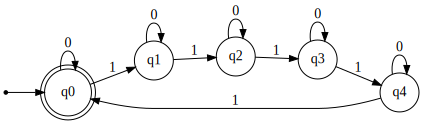

In [15]:
fa6.show_diagram()

## Computation Sequences

ACCEPTED: 01000


<IPython.core.display.Latex object>

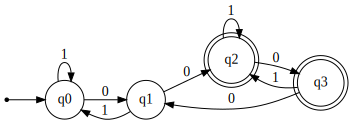

In [16]:
fa1.compseq('01000')
display(HTML("<br/>"))
fa1.show_diagram()

In [17]:
fa1.states

frozenset({'q0', 'q1', 'q2', 'q3'})

In [18]:
fa2.final_states

frozenset({'q2', 'q3'})

In [19]:
fa1.isfinite()

False

In [20]:
fa1.words_of_lengths(3, 5)

['000',
 '001',
 '100',
 '0001',
 '0010',
 '0011',
 '0100',
 '1000',
 '1001',
 '1100',
 '00000',
 '00010',
 '00011',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01100',
 '10001',
 '10010',
 '10011',
 '10100',
 '11000',
 '11001',
 '11100']

In [21]:
fa1.compseq('01001')

ACCEPTED: 01001


<IPython.core.display.Latex object>

In [22]:
fa2.compseq('0100')

REJECTED: 0100


<IPython.core.display.Latex object>

In [23]:
fa2.accepts_input('000')

False

* This is too long!
* Here is a shorter idiom!

In [24]:
'00000' in fa2

False

In [25]:
6 * '000' in fa2

False

In [26]:
20 * '1' in fa2

True

In [27]:
for n in range(1,20):
    if n * '1' in fa2:
        print(n)

1
2
4
5
7
8
10
11
13
14
16
17
19


**Exercise:** Prove that for every integet $k$, the automat **fa2** rejects the binary string `3k * '0'`

In [28]:
fa2.words_of_lengths(4)

['0001', '0011', '0101', '0111', '1011', '1101', '1111']

In [29]:
fa2.random_words(7, 3)

['0011111', '1010101', '0011001']

In [30]:
fa6.random_words(8, 6)

['00111011', '01011011', '01010111', '01110101', '11101010', '00000000']

In [31]:
fa6.random_words(12, 8)

['000101010110',
 '010101100010',
 '010011100100',
 '101000000111',
 '010110001001',
 '010010101010',
 '101100001001',
 '011110001000']

* What is common to all these words?
* Prove that the number of 1 bits in every word accepted by `fa6` must be a multiple of 5.
* Here is a a simple python script for testing these hypothesis

In [32]:
for w in fa6.random_words(21,10):
    u = w.replace('0', '')
    print(f"{w} {len(u):4}")

010101000100101100111   10
100001100011100011110   10
101110010000110100011   10
101000010001011101101   10
101000110110001011100   10
100110010010101101010   10
001101010001010100111   10
101011110111011101101   15
010010111000011001011   10
011000101010000110111   10


In [33]:
mfa2 = fa2.minify()

In [34]:
print(mfa2)

DFA(states={0, 1, 2, 3}, input_symbols={'1', '0'}, transitions={0: {'0': 0, '1': 2}, 1: {'0': 0, '1': 0}, 2: {'0': 3, '1': 1}, 3: {'0': 1, '1': 2}}, initial_state=3, final_states={1, 2}, allow_partial=False)


### Substraction
* The substraction of two automatons fa1 and fa2 is defined as the minimak automaton
  fa which accepts all words of fa1 which are not accepted by fa2.
* The Python automamat-lib package supports the substraction operation:

In [35]:
fa = fa1 - fa2

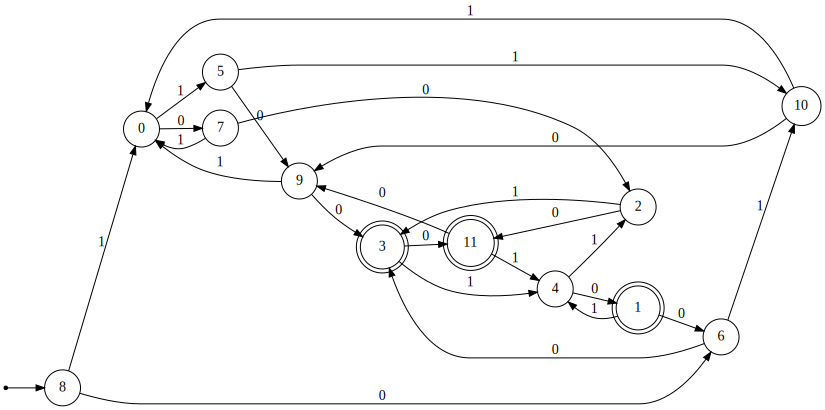

In [36]:
fa.show_diagram()

* We can test if fa is indeed the substraction $fa1 - fa2$ by checking word of constant length

In [37]:
A = fa1.words_of_lengths(4)
B = fa2.words_of_lengths(4)
set(A) - set(B)

{'0010', '0100', '1000', '1001', '1100'}

In [38]:
'0010' in fa and '0100' in fa and '1000' in fa and '1001' in fa and '1100' in fa

True

In [39]:
from itertools import product
P = list(product(['0', '1'], repeat=4))

In [40]:
D = [''.join(w) for w in P if w in fa1 and not w in fa2]
D

[]

In [41]:
fa = fa1 | fa2

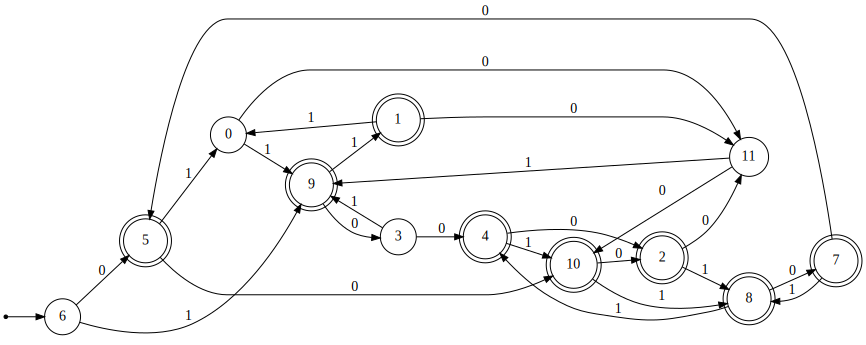

In [42]:
fa.show_diagram()

In [43]:
'0010' in fa1, '0010' in fa2, '0010' in fa

(True, False, True)

## Union and Intersection of automatons

* The following code verifies that words of length 5 and below accepted by `fa1 & fa2` are also accepted by `fa1 | fa2`

In [44]:
intersection = fa1 & fa2
union = fa1 | fa2

for w in intersection:
    if len(w)>5:
        break
    print(f"{w:>8}  {w in union}")

     001  True
     100  True
    0001  True
    0011  True
   00011  True
   00101  True
   01001  True
   01100  True
   10001  True
   10011  True
   10100  True
   11001  True


## Minimal Automata

In [45]:
minfa = fa1.minify()

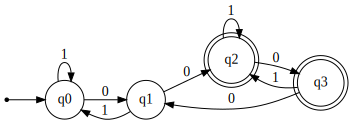

In [46]:
fa1.show_diagram()

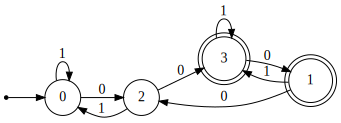

In [47]:
minfa.show_diagram()

## Automata Equivalence
* The `==` operator checks if two automata are equivalent.
* The following check shows that `fa4` and `fa5` are equivalent!
* But `fa1` and `fa2` are not.

In [48]:
fa4 == fa5

True

In [49]:
fa1 == fa2

False

In [50]:
A = fa4.words_of_lengths(3,7)
B = fa5.words_of_lengths(3,7)
A == B

True

In [51]:
fa = fa1 & fa2

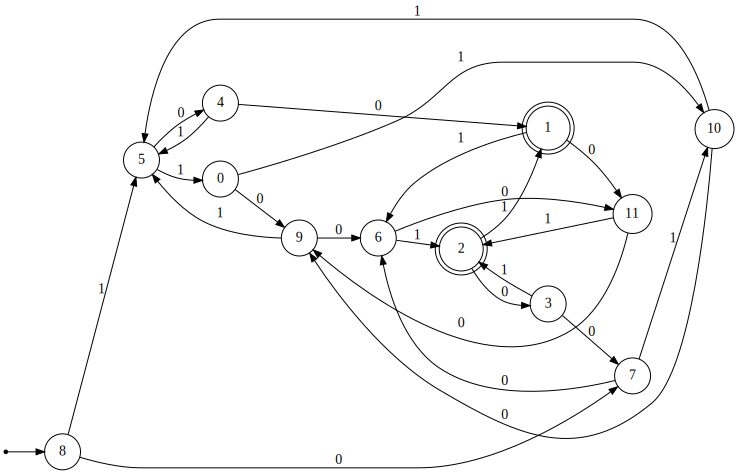

In [52]:
fa.show_diagram()

In [53]:
fa = fa1 & fa2
A = fa1.words_of_lengths(3,6)
B = fa2.words_of_lengths(3,6)
C = set(A) & set(B)
for w in C:
    print(f"{w:>8}  accepted by fa: {w in fa}")

     100  accepted by fa: True
  010001  accepted by fa: True
  110011  accepted by fa: True
  111100  accepted by fa: True
     001  accepted by fa: True
   10011  accepted by fa: True
  001101  accepted by fa: True
  110001  accepted by fa: True
  100011  accepted by fa: True
  000101  accepted by fa: True
  001011  accepted by fa: True
  110100  accepted by fa: True
  111001  accepted by fa: True
   01100  accepted by fa: True
   10001  accepted by fa: True
  100101  accepted by fa: True
  000001  accepted by fa: True
  100111  accepted by fa: True
   11001  accepted by fa: True
    0011  accepted by fa: True
  001111  accepted by fa: True
  010011  accepted by fa: True
   10100  accepted by fa: True
   00101  accepted by fa: True
   01001  accepted by fa: True
  010100  accepted by fa: True
    0001  accepted by fa: True
   00011  accepted by fa: True


In [54]:
fa7 = DFA.of_length(['0','1'], min_length=4, max_length=5)

In [55]:
len(fa7)

48

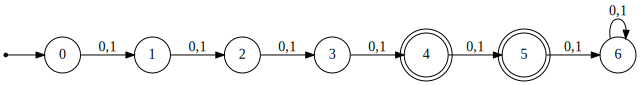

In [56]:
fa7.show_diagram()

In [57]:
fa8 = DFA.of_length(['0','1'], min_length=3, max_length=5)

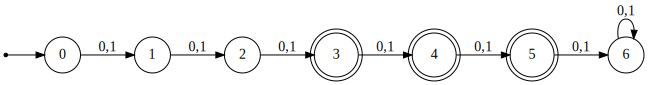

In [58]:
fa8.show_diagram()

In [59]:
fa7 <= fa8

True

In [60]:
fa7 < fa8

True

In [61]:
fa8 <= fa7

False

## The complementary automata
* The complement of a given automaton `fa1` is any automaton `fa2` which accepts
  exactly all the words that are rejected by `fa1`.
* In the autoama-lib package this is easily obtained by `f2 = ~ fa1`.

In [62]:
fa9 = ~ fa8

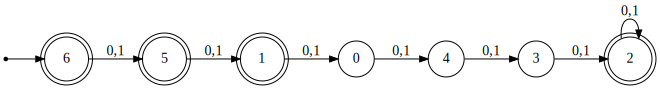

In [63]:
fa9.show_diagram()

In [64]:
'111' in fa8, '111' in fa9

(True, False)

In [65]:
'111111' in fa8, '111111' in fa9

(False, True)

## More on Minimal Automata

In [66]:
fa = DFA("""
states: q0 q1 q2 q3 q4 q5 q6 q7
input_symbols: 0 1
transitions:
    q0:  0:q1  1:q5
    q1:  0:q6  1:q2
    q2:  0:q0  1:q2
    q3:  0:q2  1:q6
    q4:  0:q7  1:q5
    q5:  0:q2  1:q6
    q6:  0:q6  1:q4
    q7:  0:q6  1:q2
initial_state: q0
final_states: q2
""")

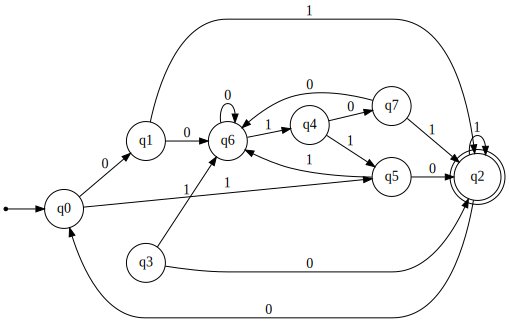

In [67]:
fa.show_diagram()

In [68]:
minfa = fa.minify()

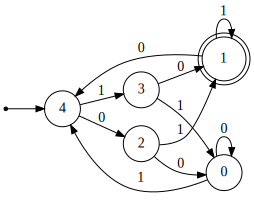

In [69]:
minfa.show_diagram()

In [70]:
minfa == fa

True

In [71]:
print(minfa)

DFA(states={0, 1, 2, 3, 4}, input_symbols={'1', '0'}, transitions={0: {'0': 0, '1': 4}, 1: {'0': 4, '1': 1}, 2: {'0': 0, '1': 1}, 3: {'0': 1, '1': 0}, 4: {'0': 2, '1': 3}}, initial_state=4, final_states={1}, allow_partial=False)


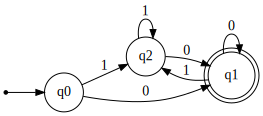

In [72]:
fa4.show_diagram()

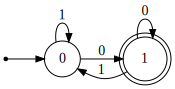

In [73]:
fa4.minify().show_diagram()

## Automata subtraction
* The subtraction of two automata `fa1` and `fa2` is the
  the minimal automaton which accepts the subtraction of
  their languages.
* In the automata-lib package, this automaton is obtained
  by the **subtraction operator** `fa1 - fa2`.

In [74]:
fa = fa1 - fa2

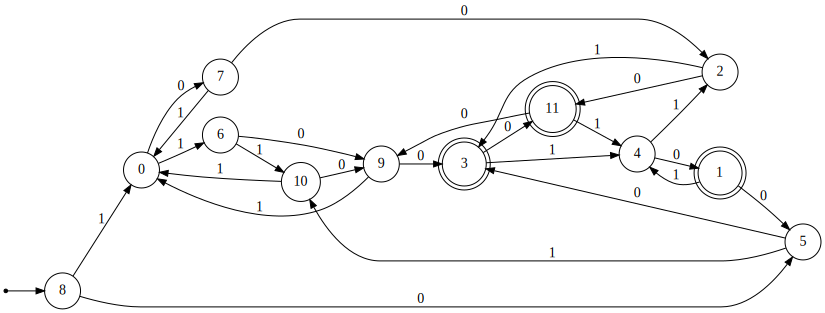

In [75]:
fa.show_diagram()

In [76]:
A = fa1[4]
B = fa2[4]
set(A) - set(B)

{'0010', '0100', '1000', '1001', '1100'}

In [77]:
'0010' in fa and '0100' in fa and '1000' in fa and '1001' in fa and '1100' in fa

True

In [78]:
D = [w for w in fa1[4] if not w in fa2]
print(D)

['0010', '0100', '1000', '1001', '1100']


## Union and intersection of automata
* The union of two automata `fa1` and `fa2` is defined as a
  minimal automaton which accepts the union of their languages.
* In the automata-lib package this automaton is obtained
  by the **union operator** `fa1 | fa2`.
* The **intersection operator** is `fa1 & fa2`.
* The following code verifies that words of length 5
  and below accepted by `fa1 & fa2` are also accepted
  by `fa1 | fa2`

In [79]:
intersection = fa1 & fa2
union = fa1 | fa2

for w in intersection:
    if len(w)>5:
        break
    print(f"{w:>8}  {w in union}")

     001  True
     100  True
    0001  True
    0011  True
   00011  True
   00101  True
   01001  True
   01100  True
   10001  True
   10011  True
   10100  True
   11001  True


In [80]:
fa = fa1 & fa2

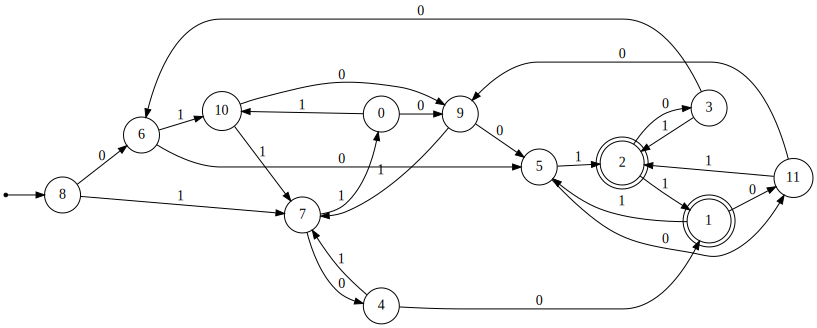

In [81]:
fa.show_diagram()

In [82]:
fa = fa1 & fa2
A = fa1.words_of_lengths(3,6)
B = fa2.words_of_lengths(3,6)
C = set(A) & set(B)
for w in C:
    print(f"{w:>8}  accepted by fa: {w in fa}")

     100  accepted by fa: True
  010001  accepted by fa: True
  110011  accepted by fa: True
  111100  accepted by fa: True
     001  accepted by fa: True
   10011  accepted by fa: True
  001101  accepted by fa: True
  110001  accepted by fa: True
  100011  accepted by fa: True
  000101  accepted by fa: True
  001011  accepted by fa: True
  110100  accepted by fa: True
  111001  accepted by fa: True
   01100  accepted by fa: True
   10001  accepted by fa: True
  100101  accepted by fa: True
  000001  accepted by fa: True
  100111  accepted by fa: True
   11001  accepted by fa: True
    0011  accepted by fa: True
  001111  accepted by fa: True
  010011  accepted by fa: True
   10100  accepted by fa: True
   00101  accepted by fa: True
   01001  accepted by fa: True
  010100  accepted by fa: True
    0001  accepted by fa: True
   00011  accepted by fa: True


In [83]:
fa = fa2 | fa5

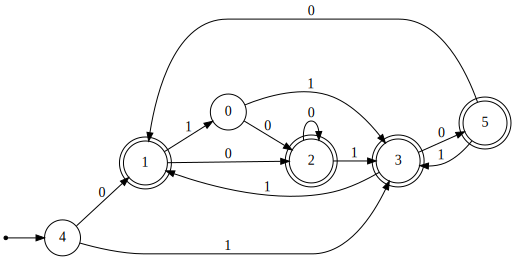

In [84]:
fa.show_diagram()

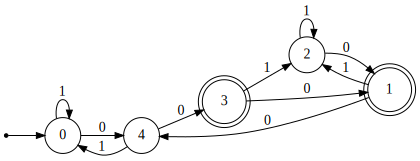

In [85]:
(fa1 & fa4).show_diagram()

In [86]:
W = (fa1 & fa4).words_of_lengths(3,4)
W

['000', '100', '0010', '0100', '1000', '1100']

In [87]:
A = fa1.words_of_lengths(3,4)
B = fa4.words_of_lengths(3,4)
set(A).intersection(B)

{'000', '0010', '0100', '100', '1000', '1100'}

In [88]:
fa7 = DFA.of_length(['0','1'], min_length=4, max_length=5)

In [89]:
len(fa7)

48

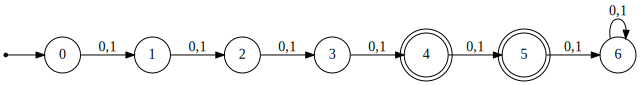

In [90]:
fa7.show_diagram()

In [91]:
fa8 = DFA.of_length(['0','1'], min_length=3, max_length=5)

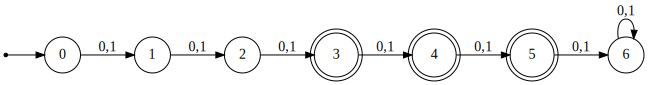

In [92]:
fa8.show_diagram()

In [93]:
fa7 <= fa8

True

In [94]:
fa7 < fa8

True

In [95]:
fa8 <= fa7

False

# Non Deterministic Finite Automata
* The automata-lib `NFA` class is used for creating a new
  instance of a deterministic finite automaton.
* The following simple examples are self explanatory on how
  this is done.

In [96]:
nfa1 = NFA("""
    name: nfa1
    states: q0 q1 q2
    input_symbols: a b
    transitions:
        q0: a:q1
        q1: a:q1, epsilon:q2
        q2: b:q0
    initial_state: q0
    final_states: q1
""")


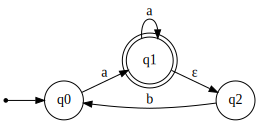

In [97]:
nfa1.show_diagram()

In [98]:
nfa2 = NFA("""
states: q0 q1 q2 q3
input_symbols: 0 1
transitions:
    q0:  0:q0 q3 ,  1:q2 q3
    q1:  0:q1 ,  epsilon:q2
    q2:  0:q0 q1 ,  epsilon:q2 q3
    q3:  0:q1
initial_state: q0
final_states: q2 q3
""")

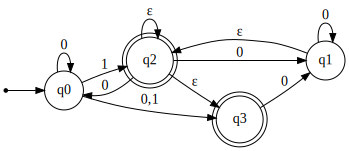

In [99]:
nfa2.show_diagram()

* Note: arrows with no symbols are epsilon transitions!

In [100]:
nfa2.states

frozenset({'q0', 'q1', 'q2', 'q3'})

In [101]:
for q in nfa2.states: print(f"{q}")

q3
q2
q0
q1


In [102]:
[print(f"{q}") for q in nfa2.states];

q3
q2
q0
q1


In [103]:
list(nfa2.final_states)

['q2', 'q3']

## Convert an NFA to an equivalent DFA

In [104]:
dfa = DFA.from_nfa(nfa2)

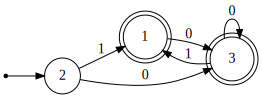

In [105]:
dfa.show_diagram()

* The `random_words` method which we used in the DFA case does not exist for NFA class!
* But after converting an NFA to a DFA we can use it to get examples of words accepted by a given NFA.

In [106]:
dfa.random_words(7, 3)

['1000000', '0010010', '0101001']

* Computation sequences for NFA are currently no available.
* A weaker for is the following general form:

In [107]:
nfa2.compseq('0000100', limit=6)

input=0000100


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

6

## NFA with epsilon transitions

In [108]:
nfa3 = NFA("""
states: q0 q1 q2 q3
input_symbols: 0 1
transitions:
    q0:  0:q0 q2, 1:q1, epsilon:q0 q1
    q1:  0:q2, epsilon:q0
    q2:  0:q1 q3
    q3:  0:q0 q1, 1:q2, epsilon:q0
initial_state: q0
final_states: q2 q3
""")

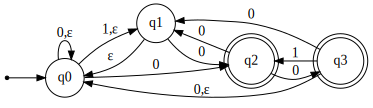

In [109]:
nfa3.show_diagram()

In [110]:
nfa3.compseq('1100', limit=7)

input=1100


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

4

* Note: arrows with no symbols are epsilon transitions!

## Example 2.5 from the book
* Lets try to write a formal definition of the NFA in example 2.5 in the book

<img src="https://samyzaf.com/afl/sol/auto3.jpg" width=40% alt="auto3.jpg"/>


In [111]:
nfa4 = NFA("""
states: q0 q1 q2 q3 q4
input_symbols: 0 1
transitions:
    q0:  0:q0 q3, 1:q0 q1
    q1:  1:q2
    q2:  0:q2 , 1:q2
    q3:  0:q4
    q4:  0:q4, 1:q4
initial_state: q0
final_states: q2 q4
""")

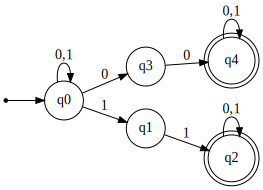

In [112]:
nfa4.show_diagram()

* Expectedly, the **Graphviz** programs generates a similar diagram.
* Lets find several computation sequences for some words accepted by `nfa4`.
* Easy to see that $w=0011$ is accepted:

In [113]:
w = '0011'
w in nfa4

True

* For an NFA there could be infinitely many number of computation sequences.
* The `compseq` method accepts an additional argument `limit` for how many of the we want to get.
* In some cases there are fewer than `limit`.

In [114]:
nfa4.compseq(w, limit=5);

input=0011


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [115]:
w = '011011'
w in nfa4

True

In [116]:
nfa4.compseq(w, limit=10)

input=011011


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2

In [117]:
w = '010'
w in nfa4

False

In [118]:
nfa4.compseq(w, limit=10)

input=010
REJECTED: 010


0

In [119]:
w = '0010000'
w in nfa4

True

In [120]:
nfa4.compseq(w, limit=10)

input=0010000


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

4

* Lets check what automata-lib gives as an equivalnt DFA
* The algorithm in the book gives

<img src="https://samyzaf.com/afl/sol/auto4.jpg" width=40% alt="auto3.jpg"/>

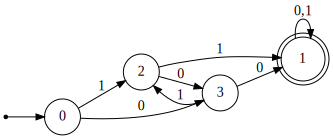

In [121]:
dfa = DFA.from_nfa(nfa4)
dfa.show_diagram()

* The Python algorithm performs one more step: minimalization.
* The book algorithm does not produce the most minimal DFA.

## Exercise 2.6
Convert the following non-deterministic finite automata to an equivalent deterministic automata.

<img src="https://samyzaf.com/afl/sol/nfa1b_small.jpg" width=35% alt="nfa1b_small.jpg"/>

## Solution
* This problem should be solved by using the algorithm outlined in Chapter 2,
  which presumably is the one used by the automata-lib package (seems like it also minimizes the automaton).
* The following code gives a minimal DFA.
* First we need a formal definition:

In [122]:
nfa5 = NFA("""
states: q0 q1 q2
input_symbols: 0 1
transitions:
    q0:  0:q0 q2, 1:q1, epsilon:q1
    q1:  0:q2
    q2:  1:q2
initial_state: q0
final_states: q0 q1
""")

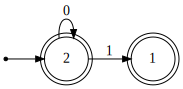

In [123]:
dfa = DFA.from_nfa(nfa5)
dfa.show_diagram()

In [124]:
mindfa = dfa.minify()

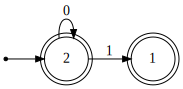

In [125]:
mindfa.show_diagram()

* So the code gives a minimal DFA.
* If we remove the state '0' (which obviously looks redundant),
  we get a minimal NFA which is equivalent to nfa5.

In [126]:
min_nfa = NFA("""
states: 2 1
input_symbols: 0 1
transitions:
    2:  0:2 , 1:1
initial_state: 2
final_states: 2 1
""")

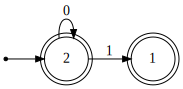

In [127]:
min_nfa.show_diagram()

* Lets check that `min_nfa` is indeed equivalent to `nfa5`:

In [128]:
min_nfa == nfa5

True

* The NFA class does not have `words_of_lengths` and `random_words` methods!
* To get all words of length 3 to 8, convert your NFA to a DFA and use the dfa:

In [129]:
dfa[3:8]

['000',
 '001',
 '0000',
 '0001',
 '00000',
 '00001',
 '000000',
 '000001',
 '0000000',
 '0000001',
 '00000000',
 '00000001']

### Convert NFA to regular expression
* Quote from the automata-lib manual: "Due to circular dependency constraints,
  there is no method to convert an NFA directly to a regular expression.
  However, it can be accomplished by first converting to a GNFA"

In [130]:
reg = GNFA.from_nfa(nfa5).to_regex()
print(reg)

0*(1?)?


## Eliminating epsilon transitions from an NFA
* The `eliminate_lambda` method can be used for eliminating epsilon transitions from an NFA.
* The result is an NFA with NO epsilon transtions!

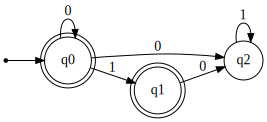

In [131]:
nfa = nfa5.eliminate_lambda()
nfa.show_diagram()

In [132]:
nfa == nfa5

True

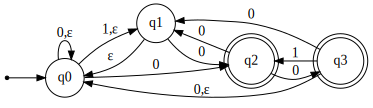

In [133]:
nfa = nfa3.eliminate_lambda()
nfa3.show_diagram()

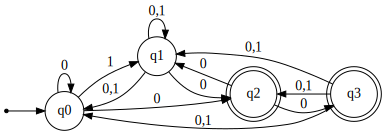

In [134]:
nfa.show_diagram()

## NFA from a regular expression

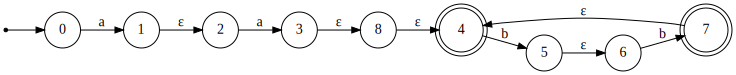

In [135]:
nfa6 = NFA.from_regex('aa(bb)*')
nfa6.show_diagram()

* Lets convert to DFA and print words for testing

In [136]:
dfa = DFA.from_nfa(nfa6)

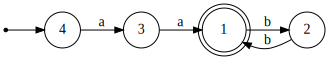

In [137]:
dfa.show_diagram()

* The following code prints all words of length 0 to 12:

In [138]:
dfa[0:12]

['aa', 'aabb', 'aabbbb', 'aabbbbbb', 'aabbbbbbbb', 'aabbbbbbbbbb']

## Addition of two automatons
* The addition of two automatons is defined as a minimal NFA which accepts
  all the word $w$, for which $w=uv$ where $u\in L(fa1)$ and $v\in L(fa2)$.
* This is also called **concatanation**.

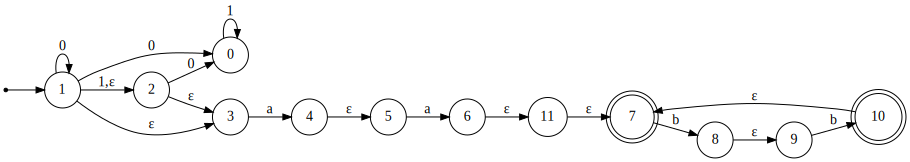

In [139]:
nfa = nfa5+nfa6
nfa.show_diagram()

In [140]:
dfa = DFA.from_nfa(nfa)
dfa[0:12]

['aa',
 '0aa',
 '1aa',
 '00aa',
 '01aa',
 'aabb',
 '000aa',
 '001aa',
 '0aabb',
 '1aabb',
 '0000aa',
 '0001aa',
 '00aabb',
 '01aabb',
 'aabbbb',
 '00000aa',
 '00001aa',
 '000aabb',
 '001aabb',
 '0aabbbb',
 '1aabbbb',
 '000000aa',
 '000001aa',
 '0000aabb',
 '0001aabb',
 '00aabbbb',
 '01aabbbb',
 'aabbbbbb',
 '0000000aa',
 '0000001aa',
 '00000aabb',
 '00001aabb',
 '000aabbbb',
 '001aabbbb',
 '0aabbbbbb',
 '1aabbbbbb',
 '00000000aa',
 '00000001aa',
 '000000aabb',
 '000001aabb',
 '0000aabbbb',
 '0001aabbbb',
 '00aabbbbbb',
 '01aabbbbbb',
 'aabbbbbbbb',
 '000000000aa',
 '000000001aa',
 '0000000aabb',
 '0000001aabb',
 '00000aabbbb',
 '00001aabbbb',
 '000aabbbbbb',
 '001aabbbbbb',
 '0aabbbbbbbb',
 '1aabbbbbbbb',
 '0000000000aa',
 '0000000001aa',
 '00000000aabb',
 '00000001aabb',
 '000000aabbbb',
 '000001aabbbb',
 '0000aabbbbbb',
 '0001aabbbbbb',
 '00aabbbbbbbb',
 '01aabbbbbbbb',
 'aabbbbbbbbbb']

In [141]:
reg = GNFA.from_nfa(nfa).to_regex()
print(reg)

0*(1?)?aa(bb)*(bb)?


## Exercise 3.13
Convert the following deterministic finite automata to an equivalent regular expression.

<img src="https://samyzaf.com/afl/figs/dfa1b.jpg" width=50% alt="dfa1b.jpg"/>

## Solution
* This problem (from Chapter 3) should be solved by using the algorithm outlined in Chapter 3,
  which presumably is the one used by the automata-lib package (seems like it also minimizes the expression).
* The following code gives the final result but does not show how to obtain it.
* First we need a formal definition:

In [142]:
dfa = DFA("""
states: q0 q1 q2
input_symbols: 0 1
transitions:
    q0:  0:q1 1:q1
    q1:  0:q1 1:q2
    q2:  0:q0 1:q1
initial_state: q0
final_states: q0 q2
""")

In [143]:
reg = GNFA.from_dfa(dfa).to_regex()
print(reg)

((0|1)(10(0|1)|(11|0))*(10|1))?


## Exercise 3.33
Convert the following deterministic finite automata to an equivalent minimal DFA.

<img src="https://samyzaf.com/afl/figs/nfa1h.jpg" width=50% alt="nfa1h.jpg"/>

## Solution
* This problem (from Chapter 3) should be solved by using the algorithm outlined in Chapter 3,
  which presumably is the one used by the automata-lib package.
* The following code gives the final result but does not show how to obtain it.
* First we need a formal definition:

In [144]:
dfa = DFA("""
states: q0 q1 q2 q3 q4 q5
input_symbols: 0 1
transitions:
    q0:  0:q3 1:q1
    q1:  0:q5 1:q2
    q2:  0:q2 1:q5
    q3:  0:q0 1:q4
    q4:  0:q5 1:q2
    q5:  0:q5 1:q5
initial_state: q0
final_states: q1 q4
""")

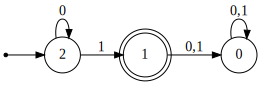

In [145]:
min_dfa = dfa.minify()
min_dfa.show_diagram()

In [146]:
reg = GNFA.from_dfa(min_dfa).to_regex()
print(reg)

0*1


## Exercise 3.33
Convert the following deterministic finite automata to an equivalent minimal DFA.

<img src="https://samyzaf.com/afl/figs/nfa1h.jpg" width=50% alt="nfa1h.jpg"/>

## Solution
* This problem (from Chapter 3) should be solved by using the algorithm outlined in Chapter 3,
  which presumably is the one used by the automata-lib package.
* The following code gives the final result but does not show how to obtain it.
* First we need a formal definition:

In [147]:
dfa[0:10]

['1',
 '01',
 '001',
 '0001',
 '00001',
 '000001',
 '0000001',
 '00000001',
 '000000001',
 '0000000001']

## Exercise 3.34.3
Find a minimal DFA for the langauge
$L = \{0^{2n} : n\geq 0\} \cup \{1^{3n} n\geq 0\}$.

## Solution
* This is the language that corresponds to the regular expression $(00)* | (111)*$
* We can use the automata-lib facilities

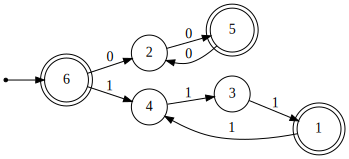

In [148]:
reg = '(00)*|(111)*'
nfa = NFA.from_regex(reg)
dfa = DFA.from_nfa(nfa, minify=True)
dfa.show_diagram()